In [2]:
#Installing Packages
import pandas as pd
import numpy as np


## Classifier Model

In [3]:
# Loading CSV file
df = pd.read_csv('dataset.csv')
df

,SEQN,GENDER,AGE,HISPANIC_O,SLEEP_HRS,DIASTOLIC,SYSTOLIC,WEIGHT,HEIGHT,BMI,...,DPQ090,SCORE,DEPRESSION,SFHL,HFHL,NDPNDB,NDPDB,DPNDB,DPDB,DPDB_VAL
0,109282.0,1.0,76.0,3.0,7.50,72.666667,139.333333,83.3,177.1,26.6,...,0,5,1.0,10.000,26.666667,0.0,0.0,1.0,0.0,2.0
1,109303.0,1.0,18.0,6.0,8.25,64.666667,101.000000,45.5,159.3,17.9,...,0,1,0.0,-2.500,3.333333,1.0,0.0,0.0,0.0,0.0
2,109321.0,2.0,19.0,4.0,7.00,61.666667,93.333333,83.5,158.7,33.2,...,0,3,0.0,8.750,11.666667,1.0,0.0,0.0,0.0,0.0
3,109330.0,1.0,76.0,6.0,8.00,71.333333,124.333333,61.5,162.5,23.3,...,0,0,0.0,20.000,41.666667,1.0,0.0,0.0,0.0,0.0
4,109382.0,2.0,70.0,1.0,10.25,62.666667,114.000000,91.7,160.1,35.8,...,0,2,0.0,25.625,20.000000,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,93689.0,2.0,69.0,1.0,8.00,66.000000,164.000000,64.8,151.9,28.1,...,0,0,0.0,80.625,85.000000,0.0,1.0,0.0,0.0,1.0
5906,93689.0,2.0,69.0,1.0,8.00,66.000000,164.000000,64.8,151.9,28.1,...,0,0,0.0,80.625,85.000000,0.0,1.0,0.0,0.0,1.0
5907,93690.0,1.0,32.0,2.0,7.00,62.000000,115.333333,89.5,164.9,32.9,...,0,0,0.0,7.500,10.000000,1.0,0.0,0.0,0.0,0.0
5908,93691.0,1.0,25.0,6.0,8.00,76.000000,112.000000,39.2,136.5,21.0,...,0,0,0.0,3.750,5.000000,1.0,0.0,0.0,0.0,0.0


In [4]:
df[['DPDB_VAL']] = df[['DPDB_VAL']].astype(int)

In [4]:
df.columns

Index(['SEQN', 'GENDER', 'AGE', 'HISPANIC_O', 'SLEEP_HRS', 'DIASTOLIC',
       'SYSTOLIC', 'WEIGHT', 'HEIGHT', 'BMI', 'DIABETES', 'DPQ010', 'DPQ020',
       'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090',
       'SCORE', 'DEPRESSION', 'SFHL', 'HFHL', 'NDPNDB', 'NDPDB', 'DPNDB',
       'DPDB', 'DPDB_VAL'],
      dtype='object')

In [5]:
X = df[['GENDER', 'AGE', 'HISPANIC_O', 'SLEEP_HRS', 'DIASTOLIC','SYSTOLIC', 'WEIGHT', 'HEIGHT', 'BMI', 'SFHL', 'HFHL']]
dependentVar = 'DPDB_VAL'

y = df[dependentVar].values

In [6]:
X = np.nan_to_num(X)
y = np.nan_to_num(y)

In [7]:
# Installing imblearn package for using SMOTE, in order to balance the dataset
!pip install imblearn

In [8]:
# Implementing Synthetic Minority Over Sampling Technique for imbalanced dataset.
# SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b. 
# ref: Page 47, Imbalanced Learning: Foundations, Algorithms, and Applications, 2013.

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
oversample = RandomOverSampler(sampling_strategy='minority')
oversample.fit(X, y)
x_over, y_over = oversample.fit_resample(X, y)

In [9]:
# Splitting dataset as 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.25, random_state=0)

In [10]:
# Trying different models to check accuracy
# 1. Decision Tree Classifier Accuracy: 70.9
# 2. Random Forest Classifier Accuracy: 73.9
# 3. XGboost Classifier Accuracy: 74.9

In [11]:

# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score
# dtree_model = DecisionTreeClassifier().fit(X_train, y_train)
# y_pred = dtree_model.predict(X_test)
# print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

In [12]:
# from sklearn.ensemble import RandomForestClassifier
# regressor1 = RandomForestClassifier(criterion='gini',
#                                  n_estimators=5,
#                                  random_state=1,
#                                  n_jobs=2)
# regressor1.fit(X_train, y_train)
# from sklearn.metrics import accuracy_score
# y_pred = regressor1.predict(X_test)
# print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

In [13]:
# from sklearn.ensemble import AdaBoostClassifier
# model = AdaBoostClassifier(n_estimators=100, random_state=0)
# model.fit(X_train,y_train)
# from sklearn.metrics import accuracy_score
# y_pred = model.predict(X_test)
# print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

In [14]:
# Installing Gradient boosting 
!pip install xgboost

In [15]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.746


In [16]:
df['DPDB_VAL']

0       2
1       0
2       0
3       0
4       1
       ..
5905    1
5906    1
5907    0
5908    0
5909    0
Name: DPDB_VAL, Length: 5910, dtype: int64

In [17]:
X_test[:,:2]

array([[ 1., 65.],
       [ 1., 19.],
       [ 2., 64.],
       ...,
       [ 2., 35.],
       [ 2., 63.],
       [ 1., 56.]])

In [18]:
df1 = pd.DataFrame(X_test[:,1:2])

df1


,0
0,65.0
1,19.0
2,64.0
3,31.0
4,65.0
...,...
2200,51.0
2201,28.0
2202,35.0
2203,63.0


In [19]:
df1['1'] = y_test
df1.columns

Index([0, '1'], dtype='object')

## plotting

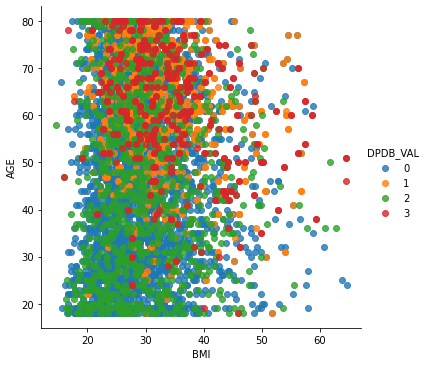

In [37]:
import matplotlib.pyplot as plt
y = [i for i in range(2205)]
# y = df['DPDB_VAL']
# plt.scatter(y, x)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')
# plt.title('Scatter plot on Iris dataset')

import seaborn as sns
from seaborn import scatterplot
# fig, ax = plt.subplots(figsize=(20,10))
# sns.scatterplot(x="BMI", y="AGE", data=df, hue='DPDB_VAL', palette="muted")
sns.lmplot(x="BMI", y="AGE", data=df, hue='DPDB_VAL',fit_reg=False)
# fig, ax = plt.subplots(figsize=(20,10))
# sns.scatterplot(x=0, y='1', hue='1', data=df1, ax = ax)

## Testing

In [35]:
# Checking for different DPDB_Val: 
# Mappings:
# NDPNDB: No Depression & No Diabetes :0
# NDPDB: No Depression & Diabetes     :1
# DPNDB: Depression & No Diabetes     :2
# DPDB: Depression & Diabetes         :3

df[1970:1980]

,SEQN,GENDER,AGE,HISPANIC_O,SLEEP_HRS,DIASTOLIC,SYSTOLIC,WEIGHT,HEIGHT,BMI,...,DPQ090,SCORE,DEPRESSION,SFHL,HFHL,NDPNDB,NDPDB,DPNDB,DPDB,DPDB_VAL
1970,84424.0,1.0,69.0,3.0,5.0,78.000000,151.333333,111.7,182.7,33.5,...,0,2,0.0,36.250,55.000000,0.0,1.0,0.0,0.0,1
1971,84425.0,2.0,51.0,7.0,6.0,78.666667,115.333333,75.3,166.7,27.1,...,0,13,1.0,6.875,15.000000,0.0,0.0,1.0,0.0,2
1972,84426.0,1.0,51.0,6.0,7.5,77.333333,131.333333,81.0,167.8,28.8,...,0,0,0.0,6.250,13.333333,1.0,0.0,0.0,0.0,0
1973,84427.0,1.0,64.0,4.0,8.0,59.333333,118.666667,64.1,168.0,22.7,...,0,2,0.0,21.250,30.000000,1.0,0.0,0.0,0.0,0
1974,84429.0,2.0,45.0,4.0,7.5,96.000000,181.333333,121.7,163.9,45.3,...,0,2,0.0,8.750,8.333333,1.0,0.0,0.0,0.0,0
1975,84431.0,1.0,46.0,1.0,9.0,64.666667,106.000000,67.3,163.3,25.2,...,0,1,0.0,4.375,16.666667,0.0,1.0,0.0,0.0,1
1976,84431.0,1.0,46.0,1.0,9.0,64.666667,106.000000,67.3,163.3,25.2,...,0,1,0.0,4.375,16.666667,0.0,1.0,0.0,0.0,1
1977,84437.0,2.0,48.0,4.0,6.0,74.000000,126.666667,80.4,162.7,30.4,...,0,4,0.0,8.125,10.000000,1.0,0.0,0.0,0.0,0
1978,84440.0,2.0,30.0,7.0,6.5,72.666667,126.000000,66.8,168.8,23.4,...,0,5,1.0,1.250,-5.000000,0.0,0.0,1.0,0.0,2
1979,84443.0,1.0,64.0,7.0,9.0,73.333333,124.000000,105.2,176.3,33.8,...,0,0,0.0,20.625,25.000000,0.0,1.0,0.0,0.0,1


In [36]:
#testing format of data to use it in backend. 
data = [[1.0,69.0,3.0,5.0,78.00,151.333, 111.7,182.7,33.5,36.250,55.00]]
data_pred = model.predict(data)
data_pred

array([1])

In [32]:
#testing format of data to use it in backend. 
data = [[2.0,22.0,3.0,7.5,60.00, 88.667,64.5,152.0,27.9,0.0,-5.0]]
data_pred = model.predict(data)
data_pred

array([2])

In [28]:
#testing format of data to use it in backend. 
data = [[1.0,78.0,4.0,10.0,85.33,173.00,53.0,178.1,16.7,34.375,60]]
data_pred = model.predict(data)
data_pred

array([3])

In [29]:
#testing format of data to use it in backend. 
data = [[1.0,37.0,4.0,9.0,76.667,122.667,102.2,184.4,30.1,12.50,18.333]]
data_pred = model.predict(data)
data_pred

array([0])

In [ ]:
# using JoBlib for creating xgboost classifier model
import joblib
from joblib import dump
dump(model, 'DPDB_classifer.pkl')